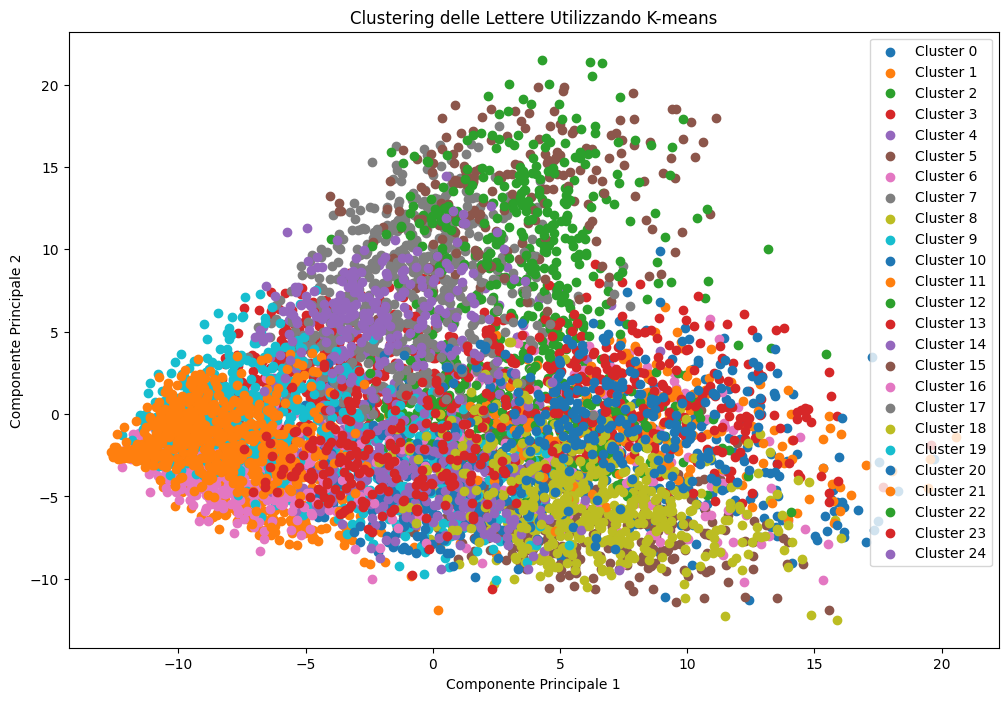

In [10]:
import numpy as np
import pandas as pd
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Carica i vettori delle caratteristiche dal file CSV
train_features_df = pd.read_csv('featureVectors/train_features.csv')

# Converti i vettori delle caratteristiche da JSON a numpy array
train_features_df['features'] = train_features_df['features'].apply(json.loads)

# Crea una matrice di caratteristiche per il clustering
features_matrix = np.vstack(train_features_df['features'].values)

# Esegui la riduzione dimensionale per visualizzazione
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_matrix)

# Esegui il clustering con K-means
num_clusters = 25  # Specifica il numero di cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_matrix)

# Aggiungi le etichette dei cluster al DataFrame
train_features_df['cluster'] = kmeans.labels_

# Visualizza i risultati del clustering
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_features[train_features_df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clustering delle Lettere Utilizzando K-means')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend()
plt.show()


In [2]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carica i vettori delle caratteristiche dal file CSV
train_features_df = pd.read_csv('featureVectors/train_features.csv')
test_features_df = pd.read_csv('featureVectors/test_features.csv')

# Converti i vettori delle caratteristiche da JSON a numpy array
train_features_df['features'] = train_features_df['features'].apply(json.loads)
test_features_df['features'] = test_features_df['features'].apply(json.loads)

# Combina i dati di train e test per formare un unico set di dati
combined_df = pd.concat([train_features_df, test_features_df])

# Crea una matrice di caratteristiche e le etichette corrispondenti
X = np.vstack(combined_df['features'].values)
y = combined_df['letter'].values  # Usa il soggetto come etichetta

# Dividi i dati in addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crea e addestra il classificatore Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predici le etichette sul set di test
y_pred = clf.predict(X_test)

# Stampa il report di classificazione e l'accuratezza
print(classification_report(y_test, y_pred))
print(f'Accuratezza: {accuracy_score(y_test, y_pred):.2f}')



              precision    recall  f1-score   support

           a       0.74      0.74      0.74       123
           b       0.84      0.51      0.64        41
           c       0.61      0.55      0.58        60
           d       0.82      0.79      0.80        86
           e       0.76      0.76      0.76       123
           f       0.65      0.51      0.57        43
           g       0.85      0.65      0.74        60
           h       0.79      0.77      0.78        74
           i       0.70      0.90      0.79       135
           k       0.88      0.41      0.56        17
           l       0.63      0.80      0.70       100
           m       0.82      0.79      0.81        63
           n       0.67      0.66      0.67        98
           o       0.70      0.79      0.74       145
           p       0.89      0.67      0.76        36
           q       0.00      0.00      0.00         6
           r       0.60      0.66      0.63        88
           s       0.87    

C:\Users\orazi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\orazi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\orazi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i